## Shubham Jadhav    
## Roll no: 282027

**Assignment 4**

Create confusion matrix based on above data and find


a) Accuracy
b) Precision
c) Recall
d) F-1 score

# Assignment 4 - Classification Metrics

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score   

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Reading CSV File

In [2]:
file_path = r"D:\ML_ASSIGNMENTS\Mall_Customers.csv"  
df = pd.read_csv(file_path)

# Dropping unnecessary columns

In [5]:
df.drop(columns=["CustomerID"], inplace=True)

# Encoding the genre column - Male and Female

In [9]:
df["Genre"] = LabelEncoder().fit_transform(df["Genre"]) 

# Setting a threshold value for spending score and creating a new column - response based on this threshold

In [7]:
threshold = df["Spending Score (1-100)"].mean()
df["RESPONSE"] = (df["Spending Score (1-100)"] > threshold).astype(int)

In [11]:
X = df.drop(columns=["Spending Score (1-100)", "RESPONSE"])  
y = df["RESPONSE"]

# Splitting into train and test data 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scaling to fit the data in model

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression 

In [17]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [19]:
y_pred = model.predict(X_test_scaled)

# Confusion Matrix and Metrics - Accuracy Score, Precision, Recall and F1- Score

Confusion Matrix:
 [[11 10]
 [ 6 13]]

Model Performance Metrics:
Accuracy: 0.6000
Precision: 0.5652
Recall: 0.6842
F1 Score: 0.6190


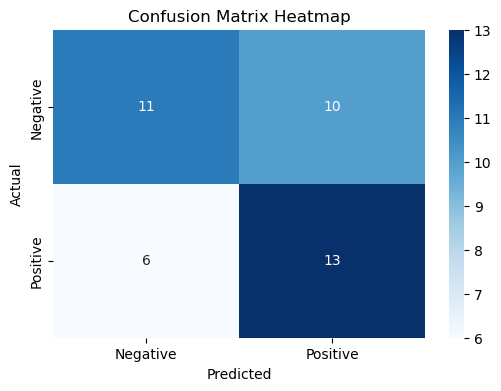

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()